<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/clustering/kmeans_example_convergence_inertia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

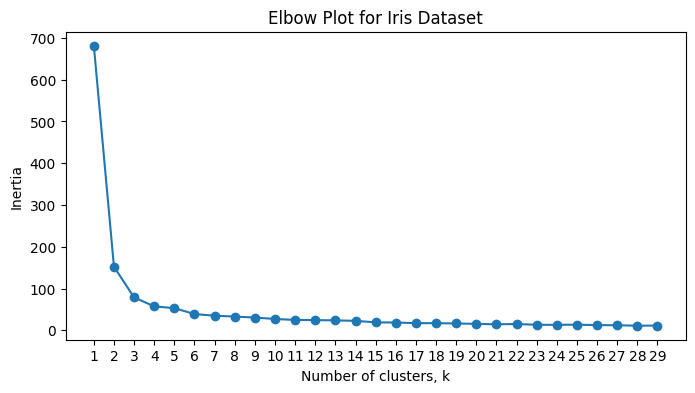

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Range of k values
ks = range(1, 30)
inertias = []

# Compute inertias for different k values
for k in ks:
    model = KMeans(n_clusters=k, n_init=1)
    model.fit(X)
    inertias.append(model.inertia_)

# Plotting the inertias to visualize the elbow method
plt.figure(figsize=(8, 4))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Iris Dataset')
plt.xticks(ks)
plt.show()


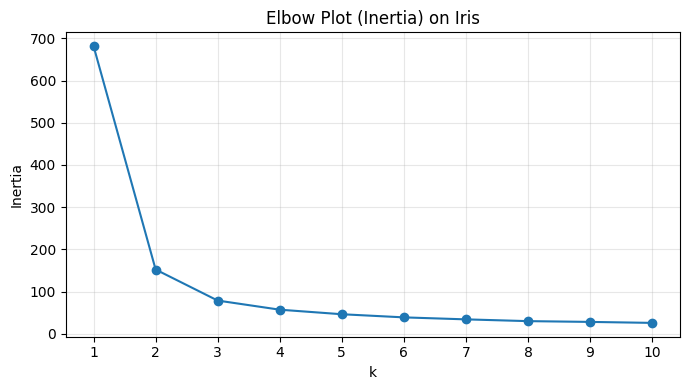

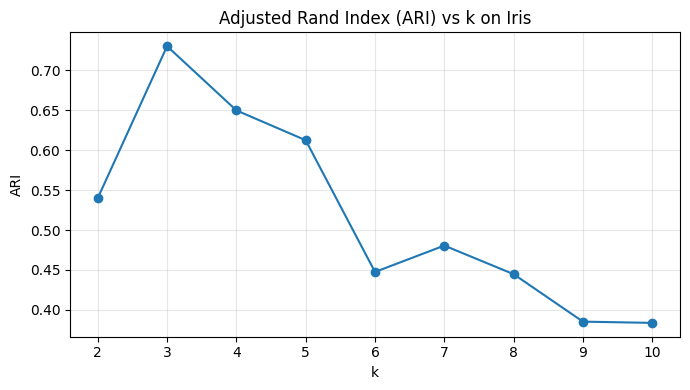


Adjusted Rand Index for k=3: 0.7302

Crosstab (counts) for k=3:
Cluster      0   1   2
True class            
0            0  50   0
1           48   0   2
2           14   0  36

Crosstab (row-normalized %) for k=3:
Cluster        0      1     2
True class                   
0            0.0  100.0   0.0
1           96.0    0.0   4.0
2           28.0    0.0  72.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score

# --- Data ---
iris = load_iris()
X = iris.data
y_true = iris.target

# --- Settings ---
ks = range(1, 11)  # change as you like
random_state = 42
n_init = 10

inertias = []
ari_by_k = {}

for k in ks:
    km = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    if k >= 2:
        ari = adjusted_rand_score(y_true, labels)
        ari_by_k[k] = ari

# --- Plots ---
plt.figure(figsize=(7, 4))
plt.plot(list(ks), inertias, '-o')
plt.title('Elbow Plot (Inertia) on Iris')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(list(ks))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

if ari_by_k:
    plt.figure(figsize=(7, 4))
    k_vals = sorted(ari_by_k.keys())
    plt.plot(k_vals, [ari_by_k[k] for k in k_vals], '-o')
    plt.title('Adjusted Rand Index (ARI) vs k on Iris')
    plt.xlabel('k')
    plt.ylabel('ARI')
    plt.xticks(k_vals)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- Cross-tab for k=3 ---
k3 = 3
km3 = KMeans(n_clusters=k3, n_init=n_init, random_state=random_state)
labels3 = km3.fit_predict(X)
ari_k3 = adjusted_rand_score(y_true, labels3)

ct = pd.crosstab(
    pd.Series(y_true, name='True class'),
    pd.Series(labels3, name='Cluster')
)

print("\nAdjusted Rand Index for k=3:", round(ari_k3, 4))
print("\nCrosstab (counts) for k=3:")
print(ct)

print("\nCrosstab (row-normalized %) for k=3:")
print((ct.div(ct.sum(axis=1), axis=0) * 100).round(1))


In [ ]:
ct

Cluster,0,1,2
True class,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [ ]:
ct.sum(axis=1)

,0
True class,
0,50
1,50
2,50


In [ ]:
type(ct)

pandas.core.frame.DataFrame

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.utils import shuffle

# --- Load and standardize Iris dataset ---
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
X_2d = X[:, :2]  # only first 2 features for visualization/demo

# --- MiniBatchKMeans setup ---
k = 3
mbk = MiniBatchKMeans(
    n_clusters=k,
    n_init=1,         # just 1 init, so we can control the centers
    batch_size=5,     # only 5 points per mini-batch
    max_iter=1,       # each call does a single update
    random_state=42
)

# --- Initialize once with partial_fit on a sample ---
#mbk.partial_fit(X_2d)

#or

# Initialize with just one small batch (random 5 points)
init_batch = X_2d[np.random.choice(len(X_2d), size=5, replace=False)]
mbk.partial_fit(init_batch)

# Now train in mini-batches (full epoch)
X_shuffled = shuffle(X_2d, random_state=42)
for start in range(0, len(X_shuffled), mbk.batch_size):
    batch = X_shuffled[start:start + mbk.batch_size]
    mbk.partial_fit(batch)


# --- Perform one "epoch": full pass through the dataset in mini-batches ---
X_shuffled = shuffle(X_2d, random_state=42)  # shuffle for fairness

for start in range(0, len(X_shuffled), mbk.batch_size):
    batch = X_shuffled[start:start + mbk.batch_size]
    mbk.partial_fit(batch)  # update with this mini-batch

# --- After the epoch ---
print("Cluster centers after 1 full pass (epoch):")
print(mbk.cluster_centers_)


Cluster centers after 1 full pass (epoch):
[[-0.11113569 -1.03543991]
 [ 1.11021591  0.08194075]
 [-0.88245238  0.75010193]]


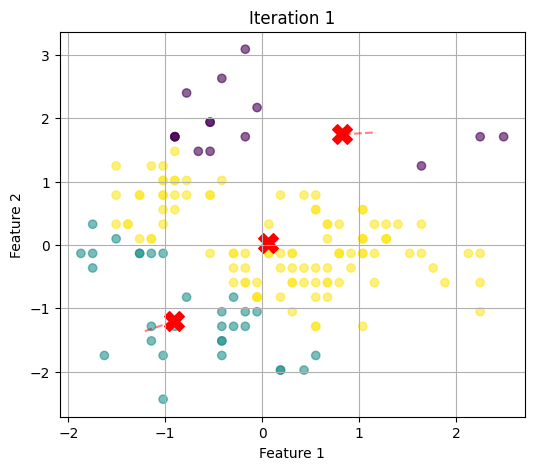

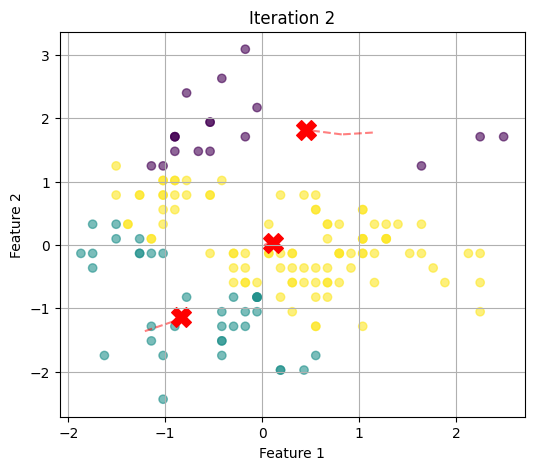

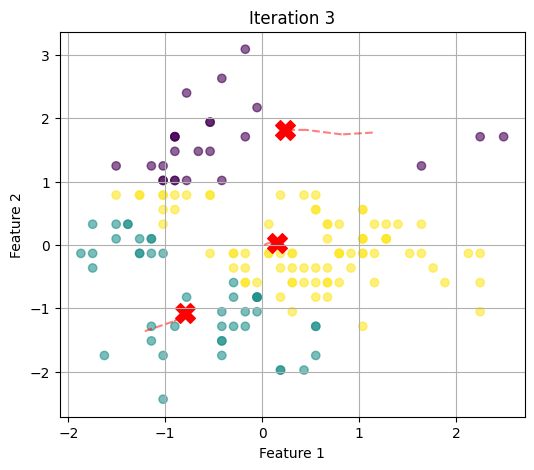

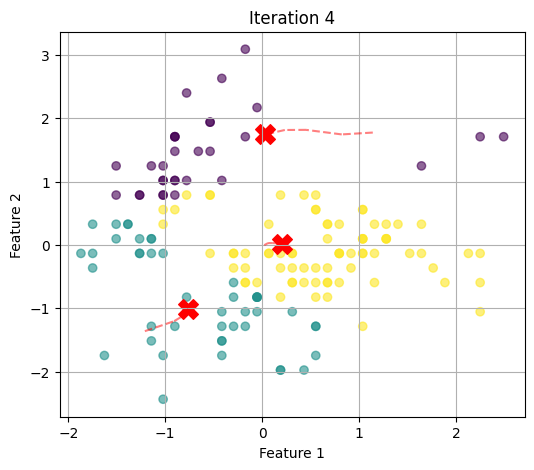

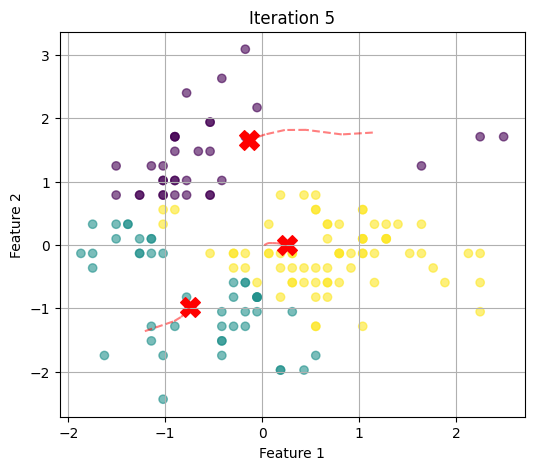

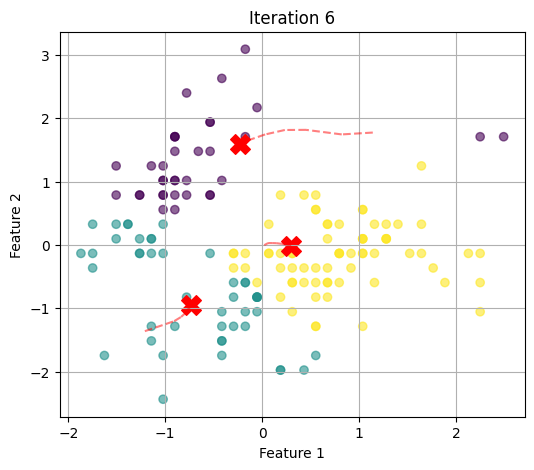

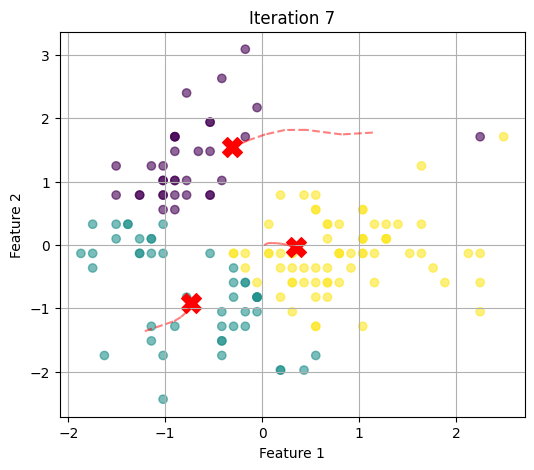

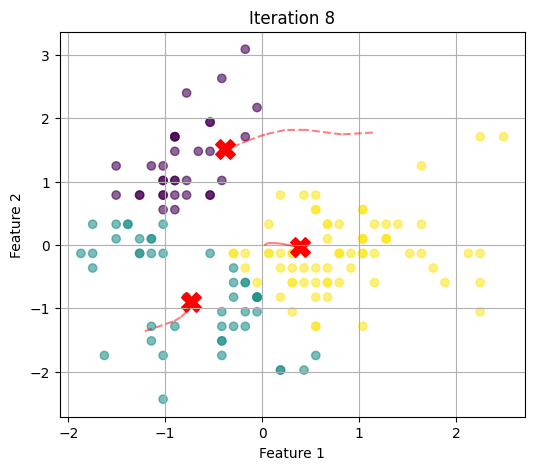

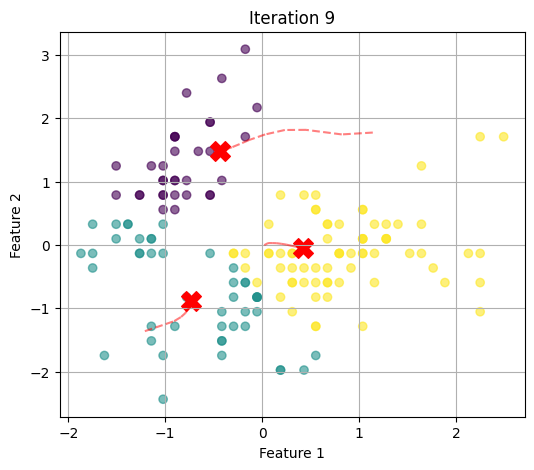

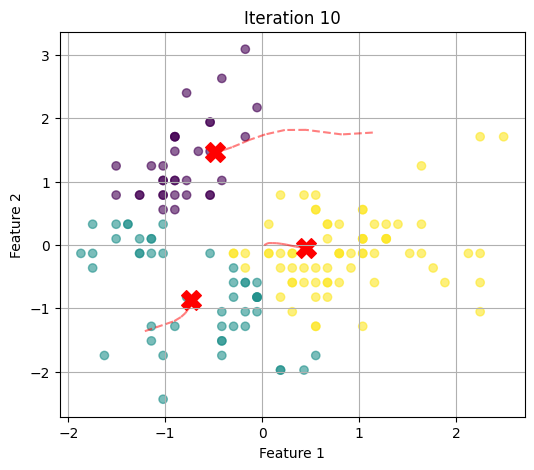

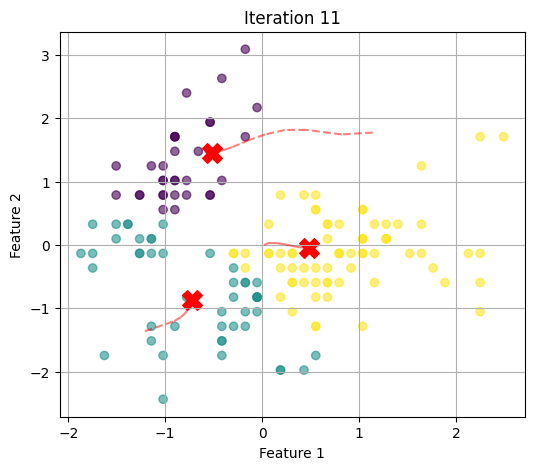

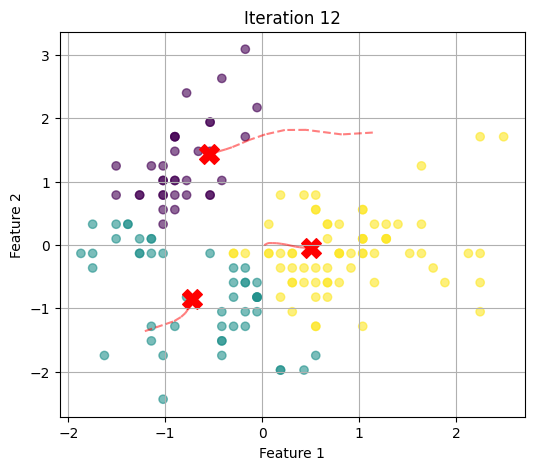

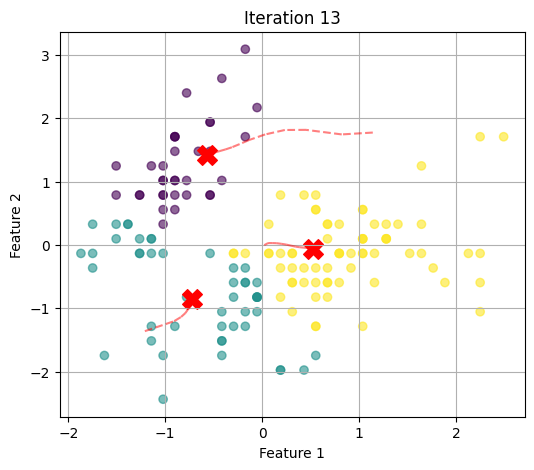

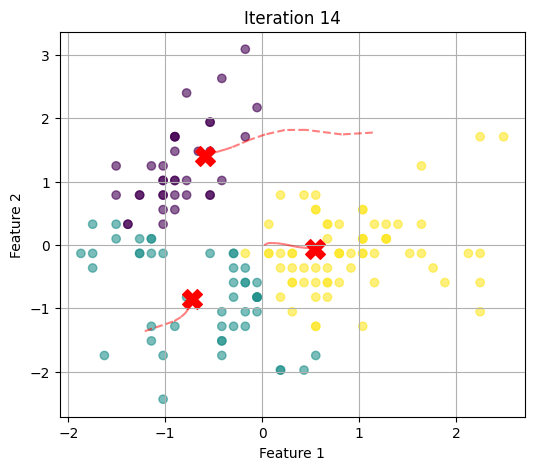

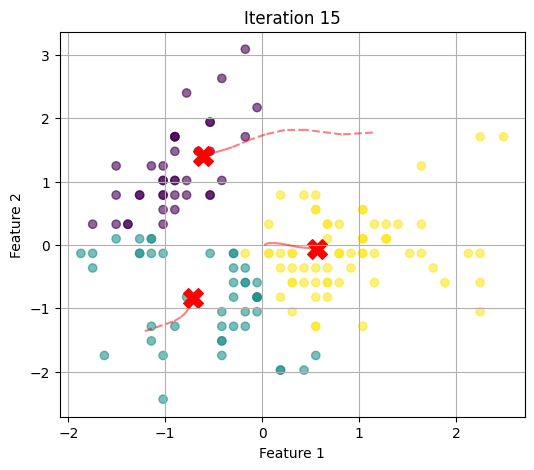

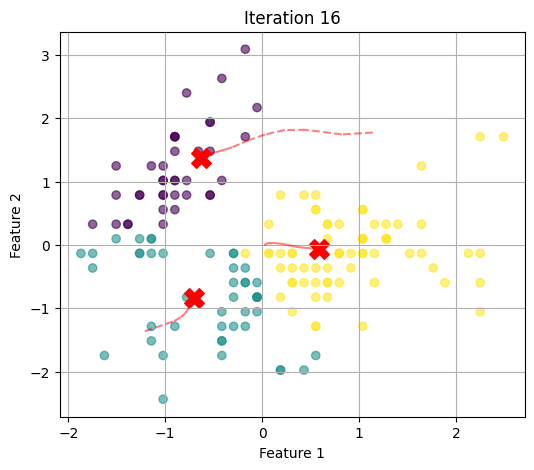

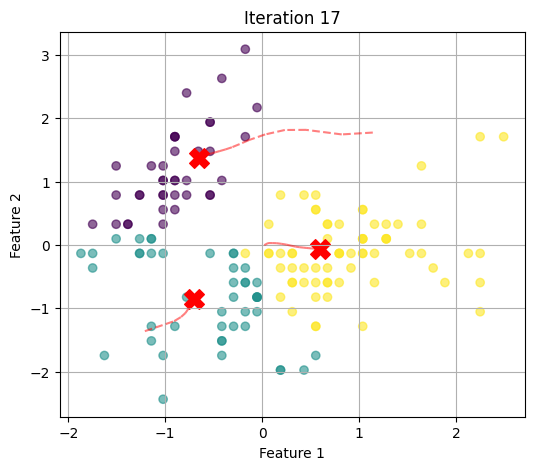

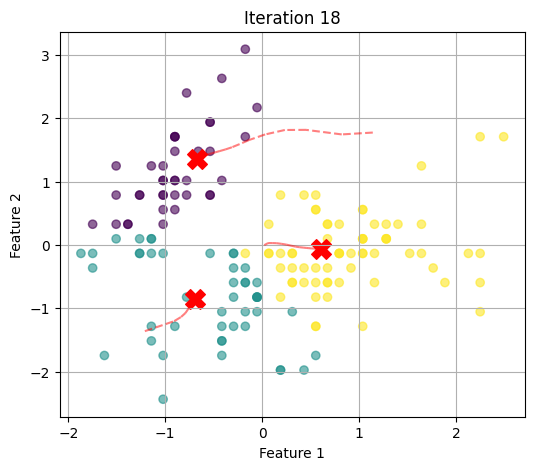

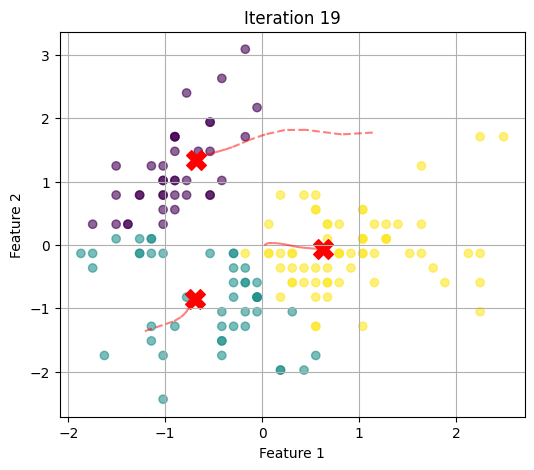

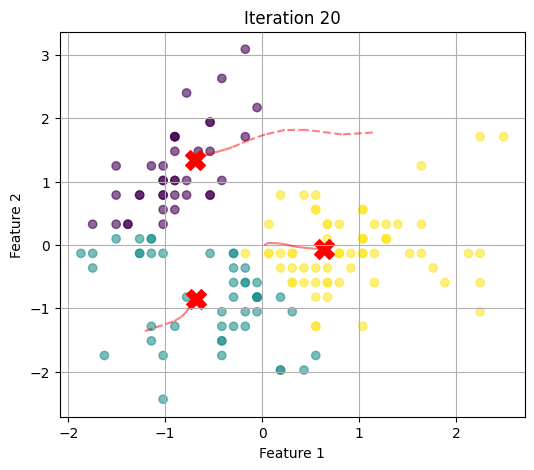

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

# Load and standardize the Iris dataset
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
X_2d = X[:, :2]  # Visualize only 2 features

# Set up MiniBatchKMeans
k = 3

# mbk = MiniBatchKMeans(n_clusters=k, n_init=1, batch_size=20, max_iter=1, random_state=42)
# Instead, let's pick arbitrary initial centers, e.g., from edge cases of the data
init_centers = np.array([[2, 2], [-2, -2], [0, 0]])  # Must match shape (k, n_features)

mbk = MiniBatchKMeans(n_clusters=3, init=init_centers, n_init=1,
                      max_iter=1, batch_size=5, random_state=42)

# Initial partial fit
mbk.partial_fit(X_2d)
centers = [mbk.cluster_centers_.copy()]

# Perform iterative learning
n_steps = 20
for i in range(n_steps):
    mbk.partial_fit(X_2d)
    centers.append(mbk.cluster_centers_.copy())

    # Plot current state
    plt.figure(figsize=(6, 5))
    labels = mbk.predict(X_2d)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
    for j in range(len(centers) - 1):
        for c in range(k):  # c is the cluster index
            plt.plot([centers[j][c][0], centers[j+1][c][0]],
                    [centers[j][c][1], centers[j+1][c][1]], 'r--', alpha=0.5)
    plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], c='red', s=200, marker='X')
    plt.title(f'Iteration {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()
